In [ ]:
!pip install pygame

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from google.colab import output
import pygame, sys, os
from pygame.locals import K_TAB, QUIT, K_RIGHT
import time
from state import State, State_2
from importlib import import_module

pygame 2.6.1 (SDL 2.28.4, Python 3.12.1)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [ ]:
# set SDL to use the dummy NULL video driver,
#   so it doesn't need a windowing system.
os.environ["SDL_VIDEODRIVER"] = "dummy"

In [ ]:
def draw(state):
    screen.fill('white')

    for x in range(3):
        for y in range(3):
            pygame.draw.rect(screen, color["white"], (x*200, y*200, 200, 200))

    if state.previous_move != None:
        next_block = state.previous_move.x * 3 + state.previous_move.y
        pygame.draw.rect(screen, color['blue'],
              ((next_block%3)*200, (next_block//3)*200, 200, 200))

        i = state.previous_move.index_local_board
        pygame.draw.rect(screen, color['orange'],(
                         (i%3)*200 + state.previous_move.y*50 + 25,
                         (i//3)*200 + state.previous_move.x*50 + 25,
                         50,50))

    for k in range(9):
        value = state.global_cells[k]
        if value != 0:
            picture = large_image[value]
            picture = pygame.transform.scale(picture, (100, 100))
            screen.blit(picture,((k%3)*200 + 50,(k//3)*200 + 50))

    for x in range(3):
        for y in range(3):
            for i in [1,2]:
                pygame.draw.line(screen, color["black"],
                                 (x*200 + i*50 + 25, y*200 + 25),
                                 (x*200 + i*50 + 25, y*200 + 175), 2)
                pygame.draw.line(screen, color["black"],
                                 (x*200 + 25, y*200 + i*50 + 25),
                                 (x*200 + 175, y*200 + i*50 + 25), 2)

    for i in range(9):
        local_board = state.blocks[i]
        for x in range(3):
            for y in range(3):
                value = local_board[x, y]
                if value != 0:
                    screen.blit(small_image[value],
                                ((i%3)*200 + y*50 + 35,
                                (i//3)*200 + x*50 + 35))

    for i in [1, 2]:
        pygame.draw.line(screen, color["black"], (i*200, 0), (i*200, 600), 3)
        pygame.draw.line(screen, color["black"], (0, i*200), (600, i*200), 3)

    pygame.display.flip()
    view = pygame.surfarray.array3d(screen)

    # convert from (width, height, channel) to (height, width, channel)
    view = view.transpose([1, 0, 2])

    # convert from rgb to bgr
    img_bgr = cv2.cvtColor(view, cv2.COLOR_RGB2BGR)

    # clear cell
    #output.clear()

    # display image
    cv2_imshow(img_bgr)


In [77]:
color = {"black": pygame.Color(0, 0, 0),
         "white": pygame.Color(255, 255, 255),
         'blue': pygame.Color(50, 255, 255),
         'orange': pygame.Color(255, 120, 0)
        }
small_image = {1: pygame.image.load('small_x.png'),
               -1: pygame.image.load('small_o.png')}
large_image = {1: pygame.image.load('large_x.png'),
               -1: pygame.image.load('large_o.png')}

pygame.init()

screen = pygame.display.set_mode((600, 600))
pygame.display.set_caption('Ultimate Tic-Tac-Toe')


def play(player_X, player_O, play_auto = True, delay_to_draw = 0, rule = 2):
    player_1 = import_module(player_X)
    player_2 = import_module(player_O)
    if rule == 1:
        state = State()
    else:
        state = State_2()
    turn = 0
    remain_time_X = 120
    remain_time_O = 120
    is_game_done = False

    while True:
        print(
'''
=======================================
|                                     |
|                                     |

               ''' + "Turn: " + str(turn)+ '''

|                                     |
|                                     |
=======================================
'''
    )
        draw(state)

        if state.game_over:
            break

        valid_moves = state.get_valid_moves
        if rule == 1:
            temp_state = State(state)
        else:
            temp_state = State_2(state)
        start_t = time.time()
        if state.player_to_move == 1:
            new_move = player_1.select_move(temp_state, remain_time_X)
            elapsed_time = time.time() - start_t
            remain_time_X -= elapsed_time
        else:
            new_move = player_2.select_move(temp_state, remain_time_O)
            elapsed_time = time.time() - start_t
            remain_time_O -= elapsed_time

        if elapsed_time > 10 or not new_move or \
                (remain_time_O < -0.1) or (remain_time_X < -0.1):
            break

        flag = False
        for item in valid_moves:
            if new_move.index_local_board == item.index_local_board and \
               new_move.x == item.x and new_move.y == item.y and \
               new_move.value == item.value:
                flag = True
                break
        if not flag:
            break

        if elapsed_time < delay_to_draw:
            # delay drawing
            time.sleep(delay_to_draw)

        state.act_move(new_move)
        if not play_auto:
            print('press enter to continue')
            input()

        turn += 1


|                                     |
|                                     |

               Turn: 0

|                                     |
|                                     |



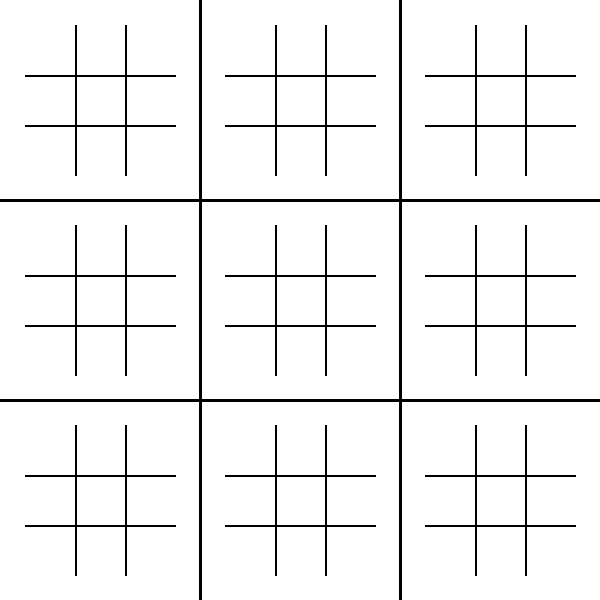


|                                     |
|                                     |

               Turn: 1

|                                     |
|                                     |



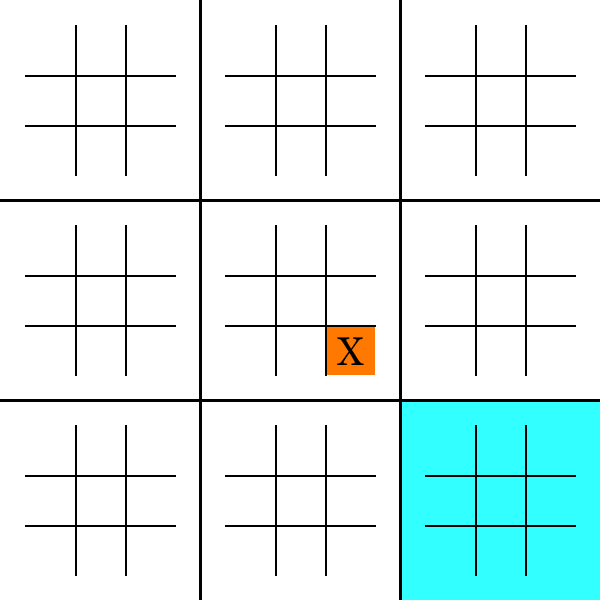


|                                     |
|                                     |

               Turn: 2

|                                     |
|                                     |



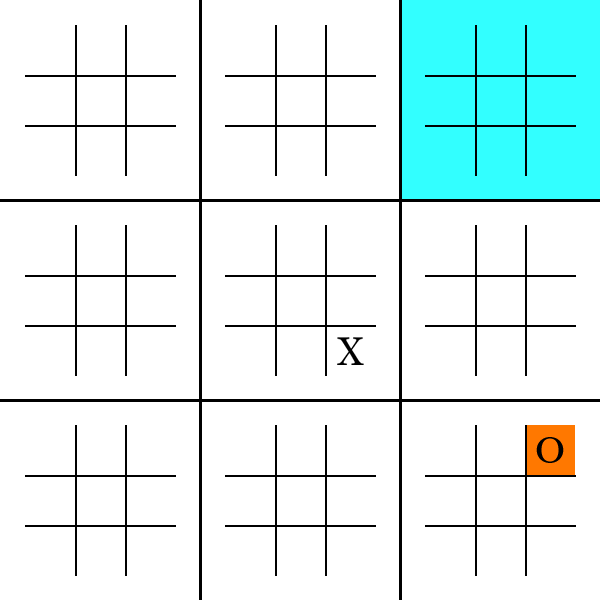


|                                     |
|                                     |

               Turn: 3

|                                     |
|                                     |



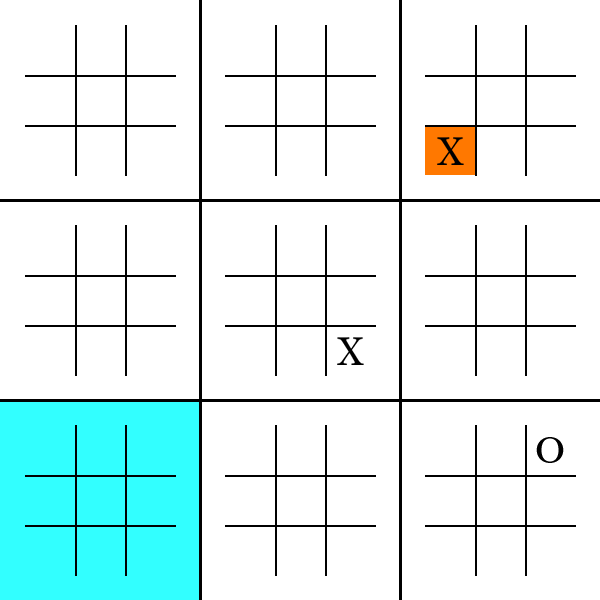


|                                     |
|                                     |

               Turn: 4

|                                     |
|                                     |



In [ ]:
play('_2110181', '_2110181', 0.2, 2)